<a href="https://colab.research.google.com/github/samula98/cap_trees/blob/main/0_kaggle_data_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import graphviz
from IPython.display import display
from sklearn import tree

import os
import requests

import zipfile
from io import BytesIO
from io import StringIO

In [ ]:
data = '/content/drive/MyDrive/Copy_of_Kaggle_flood_data.csv'

In [ ]:
df = pd.read_csv(data)

In [ ]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [ ]:
df.shape

(50000, 21)

In [ ]:
df.sample()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
46413,2,10,10,4,5,5,3,5,9,7,...,3,2,7,6,6,2,1,5,5,0.515


In [ ]:
df['Watersheds'].value_counts()

,count
Watersheds,
5,8939
4,8765
3,7136
6,7116
7,5213
2,4279
8,3196
9,1773
1,1698


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,50000.0,4.99148,2.236834,0.000,3.000,5.0,6.000,16.000
TopographyDrainage,50000.0,4.98410,2.246488,0.000,3.000,5.0,6.000,18.000
RiverManagement,50000.0,5.01594,2.231310,0.000,3.000,5.0,6.000,16.000
Deforestation,50000.0,5.00848,2.222743,0.000,3.000,5.0,6.000,17.000
Urbanization,50000.0,4.98906,2.243159,0.000,3.000,5.0,6.000,17.000
ClimateChange,50000.0,4.98834,2.226761,0.000,3.000,5.0,6.000,17.000
DamsQuality,50000.0,5.01536,2.245000,0.000,3.000,5.0,6.000,16.000
Siltation,50000.0,4.98860,2.232642,0.000,3.000,5.0,6.000,16.000
AgriculturalPractices,50000.0,5.00612,2.234588,0.000,3.000,5.0,6.000,16.000
Encroachments,50000.0,5.00638,2.241633,0.000,3.000,5.0,6.000,18.000


In [ ]:
df['ClimateChange'].value_counts()

,count
ClimateChange,
5,8794
4,8733
6,7403
3,6961
7,5183
2,4368
8,3257
9,1796
1,1654


In [ ]:
df.isnull().sum().sum() # no nulls

0

## decision tree

In [ ]:
X = df[:5000].drop('FloodProbability', axis = 1)
y = df[:5000]['FloodProbability']

In [ ]:
numLoops = 20
rms_error = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  model = DecisionTreeRegressor(max_depth = 3)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'CV RMSE: {rms_error.mean().round(2)}')

CV RMSE: 0.05


In [ ]:
# choosing tree depth
max_depths = [1,2,3,4,5,6,7,8,9,10]
rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))
numLoops = 20
for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)
  for idx in range(0, numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
pd.DataFrame(zip(max_depths, rms_depth, std_depth))

,0,1,2
0,1,0.0,0.0
1,2,0.0,0.0
2,3,0.0,0.0
3,4,0.0,0.0
4,5,0.0,0.0
5,6,0.0,0.0
6,7,0.0,0.0
7,8,0.0,0.0
8,9,0.0,0.0
9,10,0.0,0.0


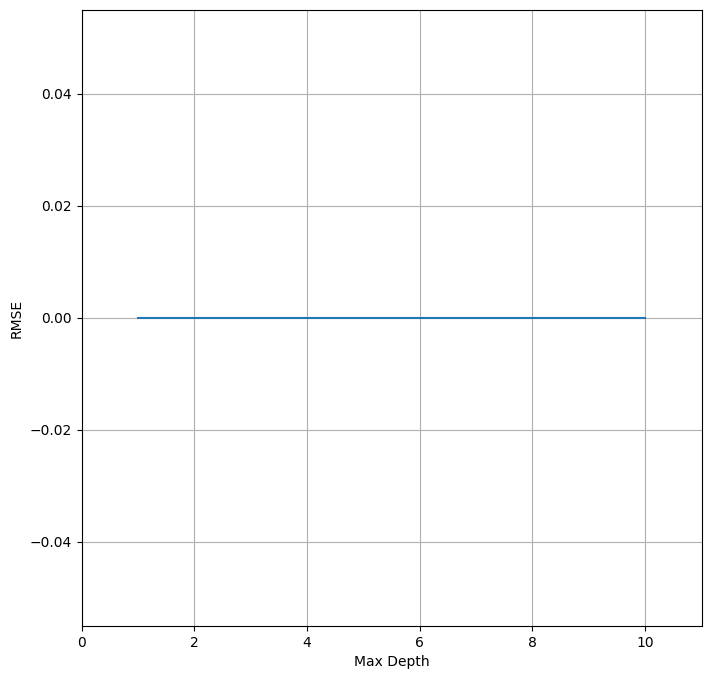

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0,11)
plt.grid()

In [ ]:
# chunky tree
display(
    graphviz.Source(
        tree.export_graphviz(
            model,
            feature_names = X.columns,
            filled = True,
        )
    )
)

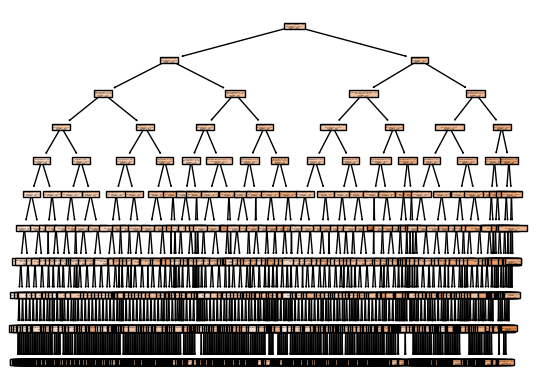

In [ ]:
# skinny tree
# plt.figure(figsize(30,15))
tree_plot = tree.plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
)

## random forest

In [ ]:
X = df[:5000].drop('FloodProbability', axis = 1)
y = df[:5000]['FloodProbability']

In [ ]:
numLoops = 20
mean_error = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  model = DecisionTreeRegressor(max_depth = 3, random_state = 0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {np.sqrt(mean_error).mean()}')
print(f'RMSE_std: {np.sqrt(mean_error).std()}')

RMSE: 0.0
RMSE_std: 0.0


In [ ]:
numLoops = 20
mean_error = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  model = RandomForestRegressor(n_estimators = 4)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mean_error[idx] = mean_squared_error(y_test, y_pred)
print(f'RMSE: {np.sqrt(mean_error).mean()}')
print(f'RMSE_std: {np.sqrt(mean_error).std()}')
np.sqrt(mean_error)[:10] # shows an array of the first 10 std rmse values

RMSE: 0.036625230269060005
RMSE_std: 0.0005529348108024739


array([0.03564989, 0.03732167, 0.03652881, 0.03664573, 0.03728564,
       0.03622568, 0.03752365, 0.03670543, 0.03711042, 0.03646682])

In [ ]:
num_trees = range(10,60,10)
cv_loops = 20
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))
for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(13)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    rfModel = RandomForestRegressor(n_estimators = trees)
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))
  print(trees, 'trees finished')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

10 trees finished
20 trees finished
30 trees finished
40 trees finished
50 trees finished


In [ ]:
pickle.dump(rfModel, open('rfModel.p', 'wb'))

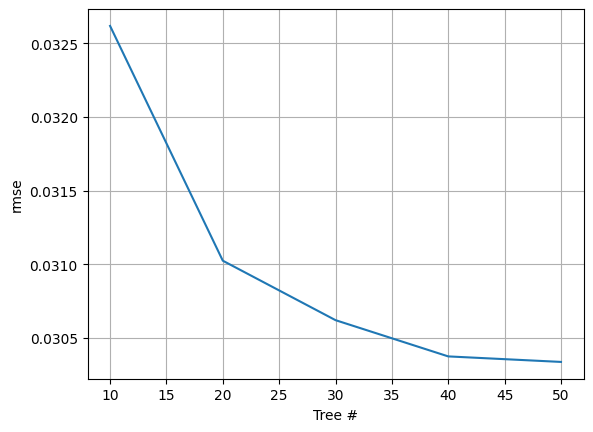

In [ ]:
plt.plot(num_trees, rmse_results)
plt.xlabel('Tree #')
plt.ylabel('rmse')
plt.grid()

In [ ]:
pd.DataFrame(zip(rmse_results, std_results,))

,0,1
0,0.032619,0.000521
1,0.031025,0.000581
2,0.030621,0.000686
3,0.030375,0.000609
4,0.030338,0.000570


Text(0.5, 0, 'feature')

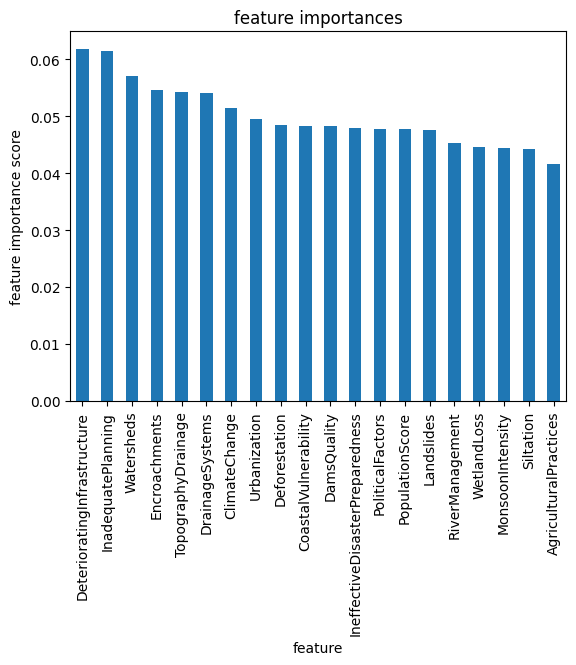

In [ ]:
# importance predictors
importances = rfModel.feature_importances_
forest_importances = pd.Series(importances, index = X.columns)
plt.figure()
forest_importances.sort_values(ascending = False).plot.bar()
plt.title('feature importances')
plt.ylabel('feature importance score')
plt.xlabel('feature')

In [ ]:
forest_importances.sort_values(ascending = False * 100).cumsum()

,0
DeterioratingInfrastructure,0.061787
InadequatePlanning,0.123188
Watersheds,0.180237
Encroachments,0.234844
TopographyDrainage,0.289067
DrainageSystems,0.343086
ClimateChange,0.394538
Urbanization,0.444118
Deforestation,0.492482
CoastalVulnerability,0.540819


## XG Boost

In [ ]:
X = df[:5000].drop('FloodProbability', axis = 1)
y = df[:5000]['FloodProbability']

In [ ]:
numLoops = 20
mse_xgb = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  xgbr = xgb.XGBRegressor(objective = 'reg:squarederror', verbosity = 0, seed = 13)
  xgbr.fit(X_train, y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test, y_pred_xgb)
print(f'RMSE: {np.sqrt(mse_xgb).mean()}')

RMSE: 0.021644515164660434


In [ ]:
y_pred_xgb[0]

0.5196149

In [ ]:
y_test.to_numpy()[0]

0.525

In [ ]:
# specifying parameters we want to try and their ranges
param_test = {
    'max_depth' : [3, 4, 5, 6, 7],
    'learning_rate' : [0.1, 0.2, 0.3, 0.4],
    'n_estimators' : [20, 40, 60,80, 100, 120, 140],
}
# grid search
gsearch = GridSearchCV(
    estimator = xgb.XGBRegressor(objective = 'reg:squarederror', seed = 10),
    param_grid = param_test,
    scoring = 'neg_mean_squared_error',
    cv = 5,
)
# fit to the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)
model = gsearch.fit(X_train, y_train)
# show results
print(model.best_params_)

{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 140}


In [ ]:
numLoops = 20
mse_xgb = np.zeros(numLoops)
for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  xgbr = xgb.XGBRegressor(
      objective = 'reg:squarederror',
      verbosity = 0,
      learning_rate = 0.2,
      max_depth = 3,
      n_estimators = 20,
      seed = 13,
  )
  xgbr.fit(X_train, y_train)
  y_pred_xgb = xgbr.predict(X_test)
  mse_xgb[idx] = mean_squared_error(y_test, y_pred_xgb)
print(f'RMSE: {np.sqrt(mse_xgb).mean()}')

RMSE: 0.035445278458486044


<ipython-input-38-96c30b6a7120>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


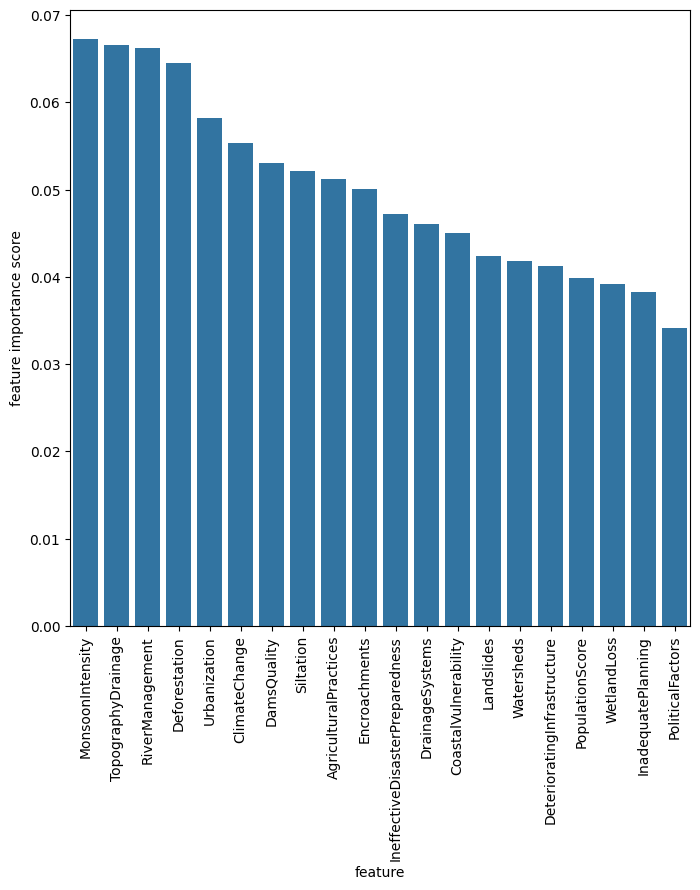

In [ ]:
# feature importance
feat_import = pd.Series(xgbr.feature_importances_, index = X.columns)
plt.figure(figsize = (8,8))
ax = sns.barplot(x = feat_import.index, y = feat_import.sort_values(ascending = False).values)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xlabel('feature')
plt.ylabel('feature importance score');

In [ ]:
(feat_import.sort_values(ascending = False) * 100).cumsum()

,0
Deforestation,6.723919
TopographyDrainage,13.380452
IneffectiveDisasterPreparedness,20.004704
CoastalVulnerability,26.459560
AgriculturalPractices,32.276909
ClimateChange,37.812798
InadequatePlanning,43.121395
Watersheds,48.337135
PopulationScore,53.458740
DeterioratingInfrastructure,58.464474
